The purpose of this notebook is to serve as the canonical example of the Random Forest regression approach for this project for demonstration purposes. It emulates the following run of `run_experiments.py`:

    python3 run_experiments.py ../data/plants5.csv migration_m --algo RF --cats oceanity dispersal_mode BreedSysCode Grime --drop Taxon migr_sterr_m "shift + 2SE" signif_shift signif_shift2 dispmode01 DispModeEng "shift + 2SE" --benchmark --save --na feature

In [14]:
import TraitData
from seaborn import distplot
%matplotlib inline

array(['body_size', 'Fliers01', 'eggs01', 'flight_start', 'flight_end',
       'flight_length', 'gen_time', 'migrants01', 'Bio1_mean', 'Bio1_std',
       'Bio1_var', 'LentLot01', 'LentLot', 'LentLot2', 'LentLot3',
       'LentLot4', 'Sbound_lat', 'Nbound_lat', 'Lat_center',
       'R_size_lat_span', 'R_size_count', 'habitat_old_1', 'habitat_old_2',
       'habitat_old_3', 'habitat_old_4', 'habitat_old_5', 'habitat_old_6',
       'habitat_old_7', 'R_size_qual_L', 'R_size_qual_M', 'R_type_S',
       'R_type_U'], dtype=object)

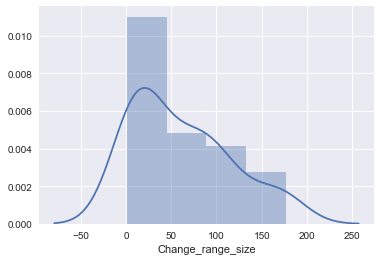

In [15]:
# DATAFILE = "../data/plants5.csv"
# RESPONSE = "migration_m"
# CATEGORIES = [
#      'oceanity',
#      'dispersal_mode',
#      'BreedSysCode',
#      'Grime'
# ]
# DROPVARS = [
#     "Taxon",
#     "migr_sterr_m",
#     "shift + 2SE",
#     "signif_shift",
#     "signif_shift2",
#     "DispModeEng"
# ]

DATAFILE = "../data/Dragonflies01.csv"
RESPONSE = "Change_range_size"
CATEGORIES = [
    "habitat_old",
    "R_size_qual",
    "R_type"
]
DROPVARS = [
    "Fliers",
    "habitat_eggs",
    "mass_migrants",
    "Taxon",
    "PhyloCode",
    "Margin_shift_km"
]
DROPNA = 1 ## drop features (0 for drop samples)

data = TraitData.TraitData(DATAFILE,
                           RESPONSE,
                           DROPVARS, 
                           CATEGORIES,
                           DROPNA)
X, x_test, Y, y_test = data.train_test_split(0.30)

distplot(data.Y)

data.X.columns.values

In [3]:
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

def kFoldCV(model, features, target, K=5):
    """
        Perform 5-fold cross-validation on samples
    """
    return -cross_val_score(model, features, target,
                            cv=KFold(K),
                            scoring='neg_mean_squared_error', n_jobs=1).mean()
def LeaveOneOutCV(model, features, target):
    """
        Perform leave-one-out cross validation on samples
    """
    return -cross_val_score(model, features, target,
                           cv=LeaveOneOut(),
                           scoring="neg_mean_squared_error").mean()

In [6]:
from pyearth import Earth
baseModel = Earth()

In [7]:

print("MSE on all data (5-fold): ", kFoldCV(baseModel, scale(data.X), data.Y))

MSE on all data (5-fold):  2809.09943593


In [8]:
print("MSE on all data (LOO): ", LeaveOneOutCV(baseModel, scale(data.X), data.Y))

MSE on all data (LOO):  3387.80247036
